# Tutorial: Visualizing Clusters of a Newick Tree File Using ETE Toolkit

This tutorial demonstrates how to use the ETE Toolkit (`ete4`) to visualize and analyze clusters in a Newick (`.nwk`) tree file. ETE Toolkit is a Python library designed for the analysis and visualization of phylogenetic trees and hierarchical data.

We will walk through the steps to load a Newick tree, process it, and display clusters effectively.

In [20]:
import numpy
import pandas as pd

import ete4
import ete3
from ete3 import TreeStyle, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node

from ete3 import ClusterTree
print(ete3.__version__)

from Bio import Phylo
from ete3 import Tree
import io


3.1.3


In [ ]:
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.
matrix = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7
A\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58
B\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12
C\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36
D\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93
E\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65
F\t-1.04\t-1.11\t0.87\t-0.14\t-0.80\t1.74\t0.48
G\t-1.57\t-1.17\t1.29\t0.23\t-0.20\t1.17\t0.26
H\t-1.53\t-1.25\t0.59\t-0.30\t0.32\t1.41\t0.77
"""
print ("Example numerical matrix")
print (matrix)

Example numerical matrix

#Names	col1	col2	col3	col4	col5	col6	col7
A	-1.23	-0.81	1.79	0.78	-0.42	-0.69	0.58
B	-1.76	-0.94	1.16	0.36	0.41	-0.35	1.12
C	-2.19	0.13	0.65	-0.51	0.52	1.04	0.36
D	-1.22	-0.98	0.79	-0.76	-0.29	1.54	0.93
E	-1.47	-0.83	0.85	0.07	-0.81	1.53	0.65
F	-1.04	-1.11	0.87	-0.14	-0.80	1.74	0.48
G	-1.57	-1.17	1.29	0.23	-0.20	1.17	0.26
H	-1.53	-1.25	0.59	-0.30	0.32	1.41	0.77



In [ ]:
t = ClusterTree("(((A,B),(C,(D,E))),(F,(G,H)));", text_array=matrix)
t.show("heatmap")
t.show("cluster_cbars")
t.show("cluster_bars")
t.show("cluster_lines")

: 

In [ ]:
# Nodes are linked to the array table
t = ClusterTree("(((A,B),(C,(D,E))),(F,(G,H)));", text_array=matrix)
array = t.arraytable

# Calculates some stats on the matrix. Needed to establish the color gradients.
matrix_dist = [i for r in range(len(array.matrix)) for i in array.matrix[r] if numpy.isfinite(i)]
matrix_max = numpy.max(matrix_dist)
matrix_min = numpy.min(matrix_dist)
matrix_avg = matrix_min + ((matrix_max - matrix_min) / 2)

# Creates a profile face that will represent node's profile as a heatmap
profileFace = ProfileFace(matrix_max, matrix_min, matrix_avg, 200, 14, "heatmap")
cbarsFace = ProfileFace(matrix_max, matrix_min, matrix_avg, 200, 70, "cbars")
nameFace = AttrFace("name", fsize=8)

# Creates my own layout function that uses previous faces
def mylayout(node):
    # If node is a leaf
    if node.is_leaf():
        # And a line profile
        add_face_to_node(profileFace, node, 0, aligned=True)
        node.img_style["size"] = 0
        add_face_to_node(nameFace, node, 1, aligned=True)

    # If node is internal
    else:
        # If silhouette is good, creates a green bubble
        if node.silhouette > 0:
            validationFace = TextFace("Silh=%0.2f" % node.silhouette, "Verdana", 10, "#056600")
            node.img_style["fgcolor"] = "#056600"
        # Otherwise, use red bubbles
        else:
            validationFace = TextFace("Silh=%0.2f" % node.silhouette, "Verdana", 10, "#940000")
            node.img_style["fgcolor"] = "#940000"

        # Sets node size proportional to the silhouette value.
        node.img_style["shape"] = "sphere"
        if -1 <= node.silhouette <= 1:
            node.img_style["size"] = 15 + int((abs(node.silhouette) * 10) ** 2)

        # If node is very internal, draw also a bar diagram with the average expression of the partition
        add_face_to_node(validationFace, node, 0)
        if len(node) > 100:
            add_face_to_node(cbarsFace, node, 1)

# Use my layout to visualize the tree
ts = TreeStyle()
ts.layout_fn = mylayout
t.show(tree_style=ts)


/opt/anaconda3/envs/bioenv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/bioenv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/bioenv/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/bioenv/lib/python3.13/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/envs/bioenv/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator

path ='/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.1-gendata/Nextstrain/trial-1/results/clusters/data/aligned_'
# Load your MSA
alignment = AlignIO.read(path+"B3.fasta", "fasta")

# Create a DistanceCalculator object using the "identity" model, which is essentially p-distance
calculator = DistanceCalculator("identity")

# Compute the distance matrix
dm = calculator.get_distance(alignment)

# Print the distance matrix
print(dm)


12-00245_B3_-1  0.000000
06-00057_B3_10  0.004386    0.000000
06-00058_B3_10  0.004386    0.000000    0.000000
07-00450_B3_10  0.004386    0.000000    0.000000    0.000000
06-00054_B3_10  0.004386    0.000000    0.000000    0.000000    0.000000
06-00050_B3_10  0.004386    0.000000    0.000000    0.000000    0.000000    0.000000
06-00036_B3_10  0.004386    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
06-00048_B3_10  0.004386    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
06-00025_B3_10  0.004386    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
12-00241_B3_-1  0.017544    0.017544    0.017544    0.017544    0.017544    0.017544    0.017544    0.017544    0.017544    0.000000
23-00796_B3_-1  0.037281    0.032895    0.032895    0.032895    0.032895    0.032895    0.032895    0.032895    0.032895    0.024123    0.000000
14-00573_B3_14  0.021930    0.021930    0.021930    0.021930    0

,12-00245_B3_-1,06-00057_B3_10,06-00058_B3_10,07-00450_B3_10,06-00054_B3_10,06-00050_B3_10,06-00036_B3_10,06-00048_B3_10,06-00025_B3_10,12-00241_B3_-1,...,21-00372_B3_103,21-00373_B3_103,23-00291_B3_103,22-00073_B3_103,24-00795_B3_103,23-00184_B3_103,18-00040_B3_103,11-00756_B3_103,11-00742_B3_103,11-00718_B3_103
12-00245_B3_-1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-00057_B3_10,0.004386,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-00058_B3_10,0.004386,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-00450_B3_10,0.004386,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-00054_B3_10,0.004386,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23-00184_B3_103,0.043860,0.043860,0.043860,0.043860,0.043860,0.043860,0.043860,0.043860,0.043860,0.030702,...,0.024123,0.024123,0.010965,0.010965,0.010965,0.000000,NaN,NaN,NaN,NaN
18-00040_B3_103,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.013158,...,0.006579,0.006579,0.019737,0.019737,0.019737,0.017544,0.000000,NaN,NaN,NaN
11-00756_B3_103,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.010965,...,0.008772,0.008772,0.021930,0.021930,0.021930,0.019737,0.002193,0.0,NaN,NaN
11-00742_B3_103,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.024123,0.010965,...,0.008772,0.008772,0.021930,0.021930,0.021930,0.019737,0.002193,0.0,0.0,NaN


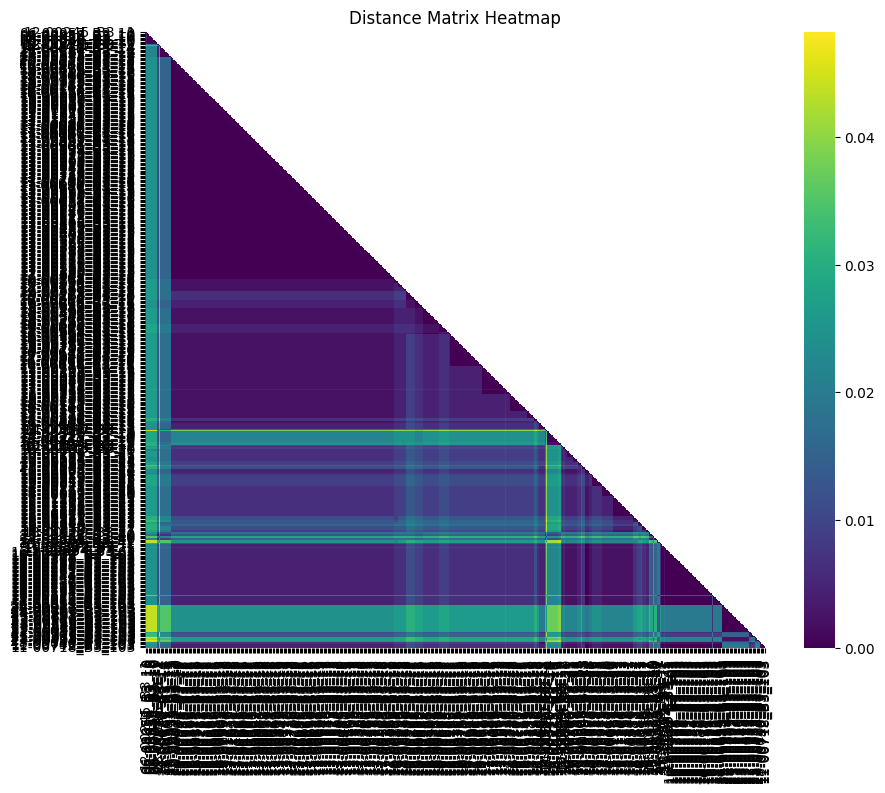

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

# Extract labels from the distance matrix
labels = dm.names  

# Build lower triangular matrix from the above dictionary
# First create an empty square matrix
n = len(labels)
mat = np.zeros((n, n))

# Fill lower triangle with your data
for col_idx, label in enumerate(labels):
    vals = dm[label]
    for row_idx, val in enumerate(vals):
        if row_idx <= col_idx:  # Ensure only lower triangle is filled
            mat[col_idx, row_idx] = val
        else:
            mat[col_idx, row_idx] = np.nan  # Fill upper triangle with NaN or zeros


# The matrix now is lower triangular, with zeros on diagonal and upper triangle zeros
# If you want full symmetric matrix, copy lower triangle to upper triangle:
#for i in range(n):
    #for j in range(i + 1, n):
        #mat[i, j] = mat[j, i]

# Create pandas DataFrame with row and column labels
df_matrix = pd.DataFrame(mat, index=labels, columns=labels)

import matplotlib.pyplot as plt

# Show the matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix, cmap="viridis", xticklabels=True, yticklabels=True)
plt.title("Distance Matrix Heatmap")
#plt.show()
df_matrix

In [13]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import Phylo

In [ ]:
constructor = DistanceTreeConstructor()
upgmatree = constructor.upgma(dm)
print(upgmatree)

Phylo.write(upgmatree, path+"upgmatree.nwk", "newick")


"""""This code snippet demonstrates how to convert a Bio.Phylo tree to an ETE3 tree.
It reads a Newick formatted tree from a string buffer and then loads it into an ETE3 Tree object.
"""

# write to a string buffer in Newick format
handle = io.StringIO()
Phylo.write(upgmatree, handle, "newick")
newick_str = handle.getvalue().strip()
handle.close()

# Load Newick string in ete3
print(newick_str)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner463')
        Clade(branch_length=0.004976955683607804, name='Inner461')
            Clade(branch_length=0.0068873355263157875, name='Inner451')
                Clade(branch_length=0.0014391447368421045, name='Inner445')
                    Clade(branch_length=0.0028782894736842125, name='Inner416')
                        Clade(branch_length=0.001918859649122806, name='23-00291_B3_103')
                        Clade(branch_length=0.00027412280701755165, name='Inner411')
                            Clade(branch_length=0.0016447368421052544, name='22-00073_B3_103')
                            Clade(branch_length=0.0005482456140351033, name='Inner399')
                                Clade(branch_length=0.001096491228070151, name='24-00795_B3_103')
                                Clade(branch_length=0.001096491228070151, name='Inner24')
                                    Clade(branch_length=0.0, name='Inner23')
                    

1

(((((23-00291_B3_103:0.00192,(22-00073_B3_103:0.00164,(24-00795_B3_103:0.00110,(((((((((((((((((((22-00081_B3_103:0.00000,22-00085_B3_103:0.00000)Inner6:0.00000,23-00474_B3_103:0.00000)Inner7:0.00000,23-00475_B3_103:0.00000)Inner8:0.00000,23-00548_B3_103:0.00000)Inner9:0.00000,23-00549_B3_103:0.00000)Inner10:0.00000,23-00551_B3_103:0.00000)Inner11:0.00000,23-00550_B3_103:0.00000)Inner12:0.00000,23-00569_B3_103:0.00000)Inner13:0.00000,23-00571_B3_103:0.00000)Inner14:0.00000,23-00577_B3_103:0.00000)Inner15:0.00000,23-00802_B3_103:0.00000)Inner16:0.00000,24-00233_B3_103:0.00000)Inner17:0.00000,24-00369_B3_103:0.00000)Inner18:0.00000,24-00407_B3_103:0.00000)Inner19:0.00000,24-00854_B3_103:0.00000)Inner20:0.00000,24-00867_B3_103:0.00000)Inner21:0.00000,24-00917_B3_103:0.00000)Inner22:0.00000,24-00933_B3_103:0.00000)Inner23:0.00000,24-01058_B3_103:0.00000)Inner24:0.00110)Inner399:0.00055)Inner411:0.00027)Inner416:0.00288,(23-00184_B3_103:0.00329,16-00221_B3_103:0.00329)Inner437:0.00151)Inner